# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

Используем датасет [PC Games 2020](https://www.kaggle.com/jesneuman/pc-games) игр Steam с добавлением данных RAWG API

In [2]:
# Будем использовать только обучающую выборку
data = pd.read_csv('games.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(30250, 27)

In [4]:
# типы колонок
data.dtypes

Unnamed: 0            int64
id                    int64
Name                 object
RawgID              float64
SteamURL             object
Metacritic          float64
Genres               object
Indie               float64
Presence            float64
Platform             object
Graphics             object
Storage              object
Memory               object
RatingsBreakdown     object
ReleaseDate          object
Soundtrack          float64
Franchise            object
OriginalCost         object
DiscountedCost       object
Players              object
Controller          float64
Languages            object
ESRB                 object
Achievements        float64
Publisher           float64
Description          object
Tags                 object
dtype: object

In [5]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Unnamed: 0              0
id                      0
Name                   94
RawgID                 94
SteamURL               55
Metacritic          26894
Genres               2968
Indie                 205
Presence               94
Platform              127
Graphics             4320
Storage              2759
Memory               1934
RatingsBreakdown    15206
ReleaseDate          3226
Soundtrack            205
Franchise           25163
OriginalCost          746
DiscountedCost      29523
Players             17916
Controller            274
Languages             223
ESRB                25503
Achievements           94
Publisher           30250
Description           219
Tags                  205
dtype: int64

In [6]:
# Первые 5 строк датасета
data.head()

,Unnamed: 0,id,Name,RawgID,SteamURL,Metacritic,Genres,Indie,Presence,Platform,...,OriginalCost,DiscountedCost,Players,Controller,Languages,ESRB,Achievements,Publisher,Description,Tags
0,0,1,Counter-Strike: Global Offensive,4291.0,https://store.steampowered.com/app/730/?snr=1_...,83.0,"Action, Free to Play",0.0,1009588.0,"PC, Xbox 360, PlayStation 3",...,Free to Play,NaN,"multiplayer, pvp, coop, online coop",1.0,"English, Czech, Danish, Dutch, Finnish, French...",Mature,179.0,NaN,Counter-Strike is a multiplayer phenomenon in ...,"FPS, Shooter, Multiplayer, Competitive, Action..."
1,1,2,Destiny 2,32.0,https://store.steampowered.com/app/1085660/?sn...,82.0,"Action, Adventure, Free to Play",0.0,1007425.0,"PlayStation 5, Web, Xbox Series X, PC, Xbox On...",...,Free To Play,NaN,"multiplayer, coop, online coop",1.0,"English, French, Italian, German, Japanese, Ko...",Teen,61.0,NaN,Destiny 2 is an online multiplayer first-perso...,"Free to Play, Looter Shooter, FPS, Multiplayer..."
2,2,3,Dota 2,10213.0,https://store.steampowered.com/app/570/?snr=1_...,90.0,NaN,0.0,1009306.0,"Linux, macOS, PC",...,Free to Play,NaN,"multiplayer, pvp, coop, online coop",1.0,"English, Bulgarian, Czech, Danish, Dutch, Finn...",NaN,0.0,NaN,What used to be an unofficial modded map for t...,"Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,3,4,The Elder Scrolls Online,41458.0,https://store.steampowered.com/app/306130/?snr...,71.0,"Massively Multiplayer, RPG",0.0,1000781.0,PC,...,$19.99,NaN,"singleplayer, multiplayer, coop",1.0,"English, French, German, Russian",NaN,0.0,NaN,Includes The Elder Scrolls Online base game an...,"RPG, MMORPG, Open World, Massively Multiplayer..."
4,4,5,Sea of Thieves,50781.0,https://store.steampowered.com/app/1172620/?sn...,68.0,"Action, Adventure",0.0,777456.0,"PC, Xbox One",...,$39.99,NaN,"multiplayer, pvp, coop, online coop",1.0,"English, French, Italian, German, Russian",Teen,308.0,NaN,Sea of Thieves is a cooperative multiplayer ac...,"Adventure, Action, Pirates, Open World, Multip..."


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 30250


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями


In [8]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((30250, 27), (30250, 2))

Удаление колонок, содержащих пустые значения приведет к сокращению колонок с 27 до 2

In [9]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((30250, 27), (0, 27))

Удаление строк, содержащих пустые значения приведет к сокращению строк с 30250 до 0

In [10]:
# Удаление колонки Publisher и Unnamed: 0 из-за неиспользования  в данной работе связей с другими датасетами
data = data.drop('Publisher', 1)
data = data.drop('Unnamed: 0', 1)
data.shape

(30250, 25)

In [11]:
# Удаление строк, имеющих пустые значения в колонке Name
data = data.dropna(axis=0, subset=['Name'])
data.shape

(30156, 25)

In [12]:
data.head()

,id,Name,RawgID,SteamURL,Metacritic,Genres,Indie,Presence,Platform,Graphics,...,Franchise,OriginalCost,DiscountedCost,Players,Controller,Languages,ESRB,Achievements,Description,Tags
0,1,Counter-Strike: Global Offensive,4291.0,https://store.steampowered.com/app/730/?snr=1_...,83.0,"Action, Free to Play",0.0,1009588.0,"PC, Xbox 360, PlayStation 3",Video card must be 256 MB or more and should b...,...,NaN,Free to Play,NaN,"multiplayer, pvp, coop, online coop",1.0,"English, Czech, Danish, Dutch, Finnish, French...",Mature,179.0,Counter-Strike is a multiplayer phenomenon in ...,"FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,Destiny 2,32.0,https://store.steampowered.com/app/1085660/?sn...,82.0,"Action, Adventure, Free to Play",0.0,1007425.0,"PlayStation 5, Web, Xbox Series X, PC, Xbox On...",NVIDIA® GeForce® GTX 660 2GB or GTX 1050 2GB /...,...,Destiny,Free To Play,NaN,"multiplayer, coop, online coop",1.0,"English, French, Italian, German, Japanese, Ko...",Teen,61.0,Destiny 2 is an online multiplayer first-perso...,"Free to Play, Looter Shooter, FPS, Multiplayer..."
2,3,Dota 2,10213.0,https://store.steampowered.com/app/570/?snr=1_...,90.0,NaN,0.0,1009306.0,"Linux, macOS, PC",nVidia GeForce 8600/9600GT,...,NaN,Free to Play,NaN,"multiplayer, pvp, coop, online coop",1.0,"English, Bulgarian, Czech, Danish, Dutch, Finn...",NaN,0.0,What used to be an unofficial modded map for t...,"Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,The Elder Scrolls Online,41458.0,https://store.steampowered.com/app/306130/?snr...,71.0,"Massively Multiplayer, RPG",0.0,1000781.0,PC,Direct X 11.0 compliant video card with 1GB RA...,...,"The Elder Scrolls, Skyrim",$19.99,NaN,"singleplayer, multiplayer, coop",1.0,"English, French, German, Russian",NaN,0.0,Includes The Elder Scrolls Online base game an...,"RPG, MMORPG, Open World, Massively Multiplayer..."
4,5,Sea of Thieves,50781.0,https://store.steampowered.com/app/1172620/?sn...,68.0,"Action, Adventure",0.0,777456.0,"PC, Xbox One",Nvidia GeForce GTX 650 or AMD Radeon 7750,...,NaN,$39.99,NaN,"multiplayer, pvp, coop, online coop",1.0,"English, French, Italian, German, Russian",Teen,308.0,Sea of Thieves is a cooperative multiplayer ac...,"Adventure, Action, Pirates, Open World, Multip..."


In [13]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,id,Name,RawgID,SteamURL,Metacritic,Genres,Indie,Presence,Platform,Graphics,...,Franchise,OriginalCost,DiscountedCost,Players,Controller,Languages,ESRB,Achievements,Description,Tags
0,1,Counter-Strike: Global Offensive,4291.0,https://store.steampowered.com/app/730/?snr=1_...,83.0,"Action, Free to Play",0.0,1009588.0,"PC, Xbox 360, PlayStation 3",Video card must be 256 MB or more and should b...,...,0,Free to Play,0,"multiplayer, pvp, coop, online coop",1.0,"English, Czech, Danish, Dutch, Finnish, French...",Mature,179.0,Counter-Strike is a multiplayer phenomenon in ...,"FPS, Shooter, Multiplayer, Competitive, Action..."
1,2,Destiny 2,32.0,https://store.steampowered.com/app/1085660/?sn...,82.0,"Action, Adventure, Free to Play",0.0,1007425.0,"PlayStation 5, Web, Xbox Series X, PC, Xbox On...",NVIDIA® GeForce® GTX 660 2GB or GTX 1050 2GB /...,...,Destiny,Free To Play,0,"multiplayer, coop, online coop",1.0,"English, French, Italian, German, Japanese, Ko...",Teen,61.0,Destiny 2 is an online multiplayer first-perso...,"Free to Play, Looter Shooter, FPS, Multiplayer..."
2,3,Dota 2,10213.0,https://store.steampowered.com/app/570/?snr=1_...,90.0,0,0.0,1009306.0,"Linux, macOS, PC",nVidia GeForce 8600/9600GT,...,0,Free to Play,0,"multiplayer, pvp, coop, online coop",1.0,"English, Bulgarian, Czech, Danish, Dutch, Finn...",0,0.0,What used to be an unofficial modded map for t...,"Free to Play, MOBA, Multiplayer, Strategy, eSp..."
3,4,The Elder Scrolls Online,41458.0,https://store.steampowered.com/app/306130/?snr...,71.0,"Massively Multiplayer, RPG",0.0,1000781.0,PC,Direct X 11.0 compliant video card with 1GB RA...,...,"The Elder Scrolls, Skyrim",$19.99,0,"singleplayer, multiplayer, coop",1.0,"English, French, German, Russian",0,0.0,Includes The Elder Scrolls Online base game an...,"RPG, MMORPG, Open World, Massively Multiplayer..."
4,5,Sea of Thieves,50781.0,https://store.steampowered.com/app/1172620/?sn...,68.0,"Action, Adventure",0.0,777456.0,"PC, Xbox One",Nvidia GeForce GTX 650 or AMD Radeon 7750,...,0,$39.99,0,"multiplayer, pvp, coop, online coop",1.0,"English, French, Italian, German, Russian",Teen,308.0,Sea of Thieves is a cooperative multiplayer ac...,"Adventure, Action, Pirates, Open World, Multip..."


## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [14]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Metacritic. Тип данных float64. Количество пустых значений 26800, 88.6%.
Колонка Indie. Тип данных float64. Количество пустых значений 205, 0.68%.
Колонка Soundtrack. Тип данных float64. Количество пустых значений 205, 0.68%.
Колонка Controller. Тип данных float64. Количество пустых значений 274, 0.91%.


In [15]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Metacritic,Indie,Soundtrack,Controller
0,83.0,0.0,0.0,1.0
1,82.0,0.0,0.0,1.0
2,90.0,0.0,0.0,1.0
3,71.0,0.0,0.0,1.0
4,68.0,0.0,0.0,1.0
...,...,...,...,...
30245,NaN,1.0,0.0,1.0
30246,NaN,1.0,0.0,0.0
30247,NaN,0.0,0.0,0.0
30248,NaN,1.0,0.0,1.0


In [16]:
# Определим уникальные значения для полей
(data['Soundtrack'].unique(),
 data['Controller'].unique(),
 data['Indie'].unique())

(array([ 0.,  1., nan]), array([ 1.,  0., nan]), array([ 0.,  1., nan]))

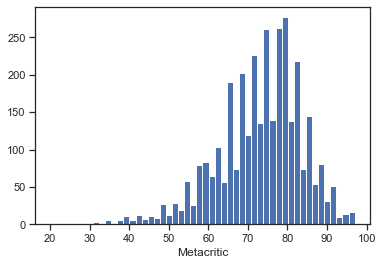

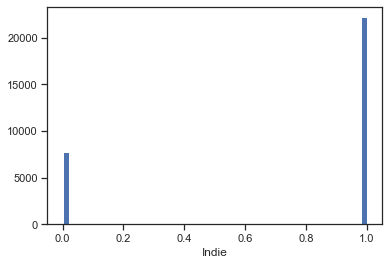

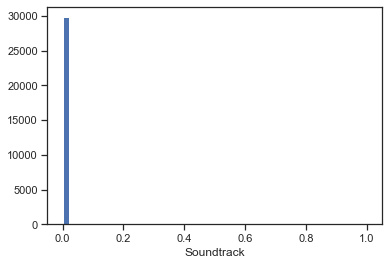

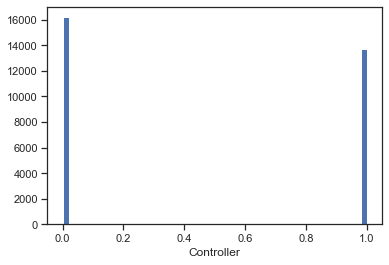

In [17]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [18]:
data_num_Metacritic = data_num[['Metacritic']]
data_num_Metacritic.head()

,Metacritic
0,83.0
1,82.0
2,90.0
3,71.0
4,68.0


In [19]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [20]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_Metacritic)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

Попробуем заполнить пропущенные значения в колонке Metacritics значениями, вычисленными по среднему арифметическому, медиане и моде.

In [21]:
strategies=['mean', 'median', 'most_frequent']

In [22]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_Metacritic)
    return data_num_imp[mask_missing_values_only]

In [23]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([72.92491061, 72.92491061, 72.92491061, ..., 72.92491061,
        72.92491061, 72.92491061]))

In [24]:
strategies[1], test_num_impute(strategies[1])

('median', array([74., 74., 74., ..., 74., 74., 74.]))

In [25]:
strategies[2], test_num_impute(strategies[2])

('most_frequent', array([80., 80., 80., ..., 80., 80., 80.]))

In [26]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [28]:
data[['Metacritic']].describe()

,Metacritic
count,3356.000000
mean,72.924911
std,10.805296
min,20.000000
25%,67.000000
50%,74.000000
75%,80.000000
max,97.000000


In [29]:
test_num_impute_col(data, 'Metacritic', strategies[0])

('Metacritic', 'mean', 26800, 72.92491060786651, 72.92491060786651)

In [30]:
test_num_impute_col(data, 'Metacritic', strategies[1])

('Metacritic', 'median', 26800, 74.0, 74.0)

In [31]:
test_num_impute_col(data, 'Metacritic', strategies[2])

('Metacritic', 'most_frequent', 26800, 80.0, 80.0)

### Обработка пропусков в категориальных данных

In [33]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка SteamURL. Тип данных object. Количество пустых значений 55, 0.18%.
Колонка Genres. Тип данных object. Количество пустых значений 2962, 9.79%.
Колонка Platform. Тип данных object. Количество пустых значений 33, 0.11%.
Колонка Graphics. Тип данных object. Количество пустых значений 4305, 14.23%.
Колонка Storage. Тип данных object. Количество пустых значений 2752, 9.1%.
Колонка Memory. Тип данных object. Количество пустых значений 1927, 6.37%.
Колонка RatingsBreakdown. Тип данных object. Количество пустых значений 15112, 49.96%.
Колонка ReleaseDate. Тип данных object. Количество пустых значений 3132, 10.35%.
Колонка Franchise. Тип данных object. Количество пустых значений 25079, 82.91%.
Колонка OriginalCost. Тип данных object. Количество пустых значений 743, 2.46%.
Колонка DiscountedCost. Тип данных object. Количество пустых значений 29429, 97.29%.
Колонка Players. Тип данных object. Количество пустых значений 17868, 59.07%.
Колонка Languages. Тип данных object. Количество пустых 

- Колонки, содержащие менее 5% пропусков выбираем для построения модели.
- Колонки, содержащие менее 30% пропусков также выбираем для построения модели.
- Колонки RatingsBreakdown (49.96%) и Players (59.07%) не выбираем для построения модели, в случае отсутствия необходимости в этих колонках.
- Колонки Franchise (82.91%), DiscountedCost (97.29%) и ESRB (84.0%) не выбираем для построения модели в любом случае.

In [34]:
cat_temp_data = data[['Genres']]
cat_temp_data.head()

,Genres
0,"Action, Free to Play"
1,"Action, Adventure, Free to Play"
2,NaN
3,"Massively Multiplayer, RPG"
4,"Action, Adventure"


In [35]:
cat_temp_data['Genres'].unique()

array(['Action, Free to Play', 'Action, Adventure, Free to Play', nan,
       ..., 'Casual, Indie, Massively Multiplayer, RPG, Early Access',
       'Action, Adventure, Casual, Racing, Simulation, Strategy',
       'Action, Adventure, Casual, Sports, Strategy'], dtype=object)

In [36]:
cat_temp_data[cat_temp_data['Genres'].isnull()].shape

(2962, 1)

In [37]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Action, Free to Play'],
       ['Action, Adventure, Free to Play'],
       ['Action, Indie'],
       ...,
       ['Casual'],
       ['Action, Adventure, Casual, Indie'],
       ['Action, Indie']], dtype=object)

In [38]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Action', 'Action, Adventure', 'Action, Adventure, Casual', ...,
       'Strategy, Indie, Casual, Simulation', 'Strategy, RPG, Indie',
       'Strategy, Simulation'], dtype=object)

In [39]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Action, Free to Play'],
       ['Action, Adventure, Free to Play'],
       ['NA'],
       ...,
       ['Casual'],
       ['Action, Adventure, Casual, Indie'],
       ['NA']], dtype=object)

In [40]:
np.unique(data_imp3)

array(['Action', 'Action, Adventure', 'Action, Adventure, Casual', ...,
       'Strategy, Indie, Casual, Simulation', 'Strategy, RPG, Indie',
       'Strategy, Simulation'], dtype=object)

In [41]:
data_imp3[data_imp3=='NA'].size

2962

Таким образом, в колонку Genres вставлено 2962 "NA", вместо пропущенных значений.

# Преобразование категориальных признаков в числовые

In [42]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,"Action, Free to Play"
1,"Action, Adventure, Free to Play"
2,"Action, Indie"
3,"Massively Multiplayer, RPG"
4,"Action, Adventure"
...,...
30151,"Casual, Indie"
30152,Indie
30153,Casual
30154,"Action, Adventure, Casual, Indie"


## Кодирование категорий целочисленными значениями - [label encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [44]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [45]:
cat_enc['c1'].unique()

array(['Action, Free to Play', 'Action, Adventure, Free to Play',
       'Action, Indie', ...,
       'Casual, Indie, Massively Multiplayer, RPG, Early Access',
       'Action, Adventure, Casual, Racing, Simulation, Strategy',
       'Action, Adventure, Casual, Sports, Strategy'], dtype=object)

In [46]:
np.unique(cat_enc_le)

array([   0,    1,    2, ..., 1003, 1004, 1005])

## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

In [47]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [48]:
cat_enc.shape

(30156, 1)

In [49]:
cat_enc_ohe.shape

(30156, 1006)

In [50]:
cat_enc_ohe

<30156x1006 sparse matrix of type '<class 'numpy.float64'>'
	with 30156 stored elements in Compressed Sparse Row format>

In [51]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
cat_enc.head(10)

,c1
0,"Action, Free to Play"
1,"Action, Adventure, Free to Play"
2,"Action, Indie"
3,"Massively Multiplayer, RPG"
4,"Action, Adventure"
5,"Adventure, Indie, Simulation, Strategy, Early ..."
6,Action
7,"Action, Indie, Racing, Sports"
8,Action
9,"Action, Adventure, Indie, Massively Multiplaye..."


## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [53]:
pd.get_dummies(cat_enc).head()

,c1_Action,"c1_Action, Adventure","c1_Action, Adventure, Casual","c1_Action, Adventure, Casual, Early Access","c1_Action, Adventure, Casual, Free to Play, Indie","c1_Action, Adventure, Casual, Free to Play, Indie, Early Access","c1_Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer","c1_Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer, RPG","c1_Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer, RPG, Early Access","c1_Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer, RPG, Simulation",...,c1_Strategy,"c1_Strategy, Action","c1_Strategy, Action, Simulation","c1_Strategy, Casual","c1_Strategy, Early Access","c1_Strategy, Indie","c1_Strategy, Indie, Casual","c1_Strategy, Indie, Casual, Simulation","c1_Strategy, RPG, Indie","c1_Strategy, Simulation"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Genres_Action,"Genres_Action, Adventure","Genres_Action, Adventure, Casual","Genres_Action, Adventure, Casual, Early Access","Genres_Action, Adventure, Casual, Free to Play, Indie","Genres_Action, Adventure, Casual, Free to Play, Indie, Early Access","Genres_Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer","Genres_Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer, RPG","Genres_Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer, RPG, Early Access","Genres_Action, Adventure, Casual, Free to Play, Indie, Massively Multiplayer, RPG, Simulation",...,"Genres_Strategy, Action","Genres_Strategy, Action, Simulation","Genres_Strategy, Casual","Genres_Strategy, Early Access","Genres_Strategy, Indie","Genres_Strategy, Indie, Casual","Genres_Strategy, Indie, Casual, Simulation","Genres_Strategy, RPG, Indie","Genres_Strategy, Simulation",Genres_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Масштабирование данных

- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [55]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [56]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Metacritic']])

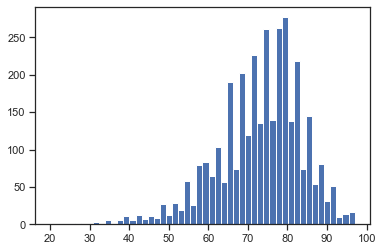

In [57]:
plt.hist(data['Metacritic'], 50)
plt.show()

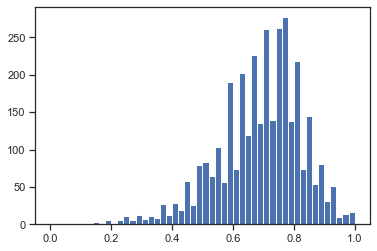

In [58]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [59]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Metacritic']])

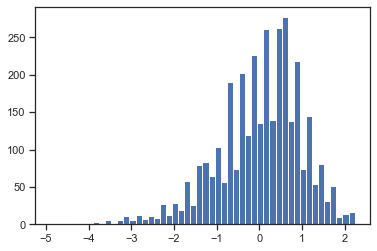

In [60]:
plt.hist(sc2_data, 50)
plt.show()